### Analizando resultados parámetros por pareja

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
sns.set()

In [24]:
data = pd.read_csv('../Data/output4.csv')
data.head(2)

,index,Dyad,Round,Player,Answer,Time,a11,a12,a13,a14,...,DLIndex,Similarity,Score_LAG1,Norm_Score_LAG1,Consistency_LEAD1,Dif_consist_LAG1,Category_LAG1,RegionGo,RegionGo2,Similarity_LAG1
0,0,1004739415,1,100472,Present,1,0,0,0,0,...,0.015625,1,NaN,NaN,0.030303,NaN,NaN,NaN,NaN,NaN
1,0,1004739415,2,100472,Absent,50,1,1,1,0,...,0.484375,27,32.0,1.0,0.212121,NaN,NaN,NaN,NaN,1.0


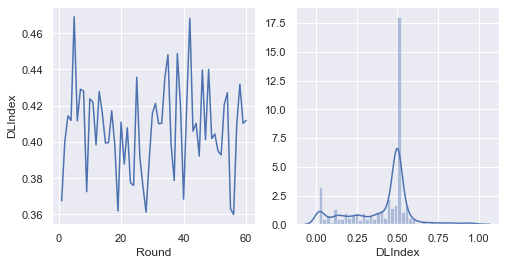

In [25]:
aux = data.groupby(['Round'])['DLIndex'].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.lineplot(x='Round', y='DLIndex', data=aux, ax=axes[0])
sns.distplot(data['DLIndex'], ax=axes[1], hist=True)
plt.show()

ValueError: min() arg is an empty sequence

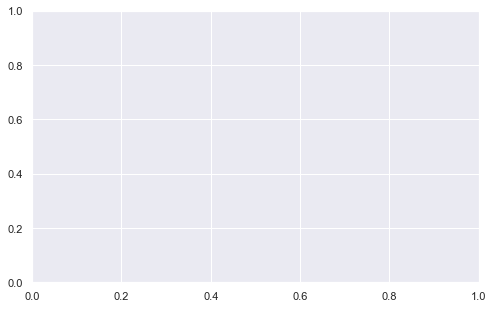

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot('Category', data=data)
plt.show()

In [ ]:
from FRA import FRASim

cols = ['a' + str(i+1) + str(j+1) for i in range(8) for j in range(8)]

for dyad, grp in df.groupby(['Dyad', 'Round']):
    players = grp.Player.unique()
    pl1 = grp[grp['Player']==players[0]]
    pl2 = grp[grp['Player']==players[1]]
    region1 = pl1[cols].apply(lambda x: list(x), axis=1)
    region2 = pl2[cols].apply(lambda x: list(x), axis=1)
    overlap = np.multiply(region1, region2)
    print(overlap)

#df['overlap'] = df.apply(lambda x: find_overlap(x), axis=1)

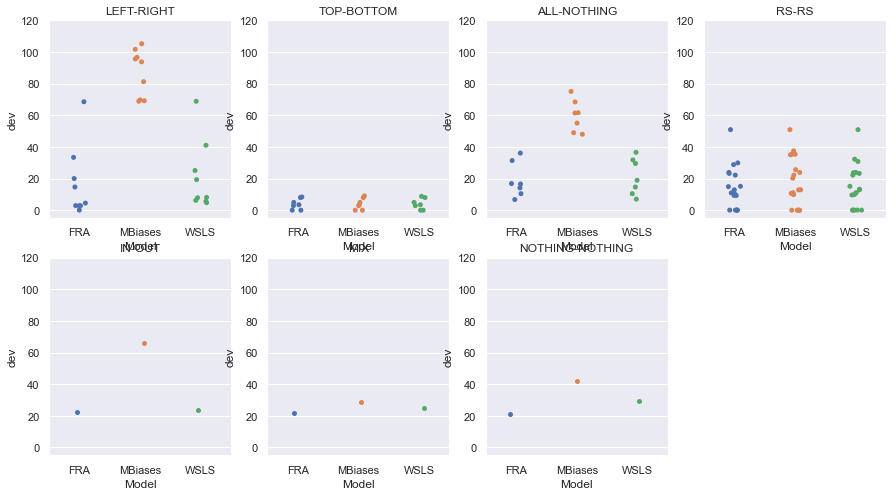

In [162]:
fig = plt.figure(figsize=(15,8))
split = df_fitted['DL'].unique()
for i, sp in enumerate(split):
    df = df_fitted[df_fitted['DL']==sp].sort_values(by='Model')
    plt.subplot(2,4,i+1)
    ax = sns.stripplot(x='Model', y='dev', data=df)
    ax.set_ylim([-5,120])
    plt.xlabel('Model')
    plt.ylabel('dev')
    plt.title(sp)
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


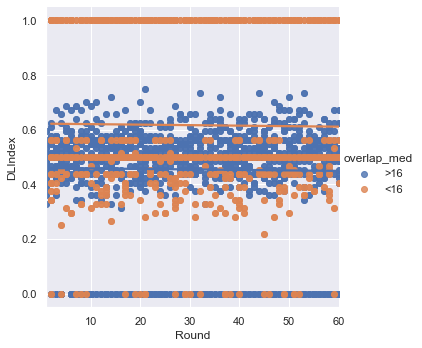

In [13]:
df_MB['overlap_med'] = df_MB.Joint > 16
df_MB['overlap_med'] = np.where(df_MB.Joint == False, '<16', '>16')
sns.lmplot(x='Round', y='DLIndex', 
           hue='overlap_med', data=df_MB,
          ci=None, size=5)

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


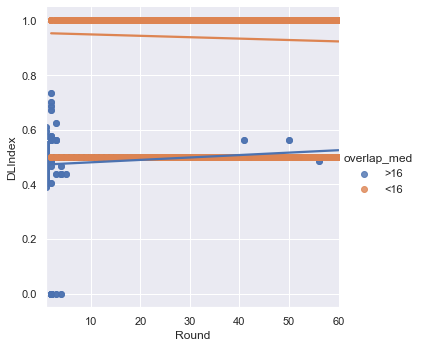

In [12]:
df_FR['overlap_med'] = df_FR.Joint > 16
df_FR['overlap_med'] = np.where(df_FR.Joint == False, '<16', '>16')
sns.lmplot(x='Round', y='DLIndex', 
           hue='overlap_med', data=df_FR,
          ci=None, size=5)